<a href="https://colab.research.google.com/github/dev-singh-kanyal/prip-lab/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

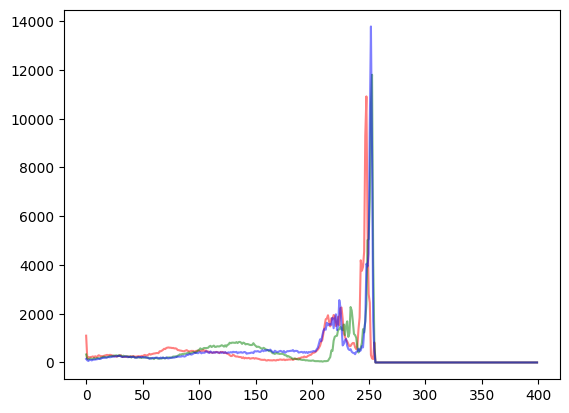

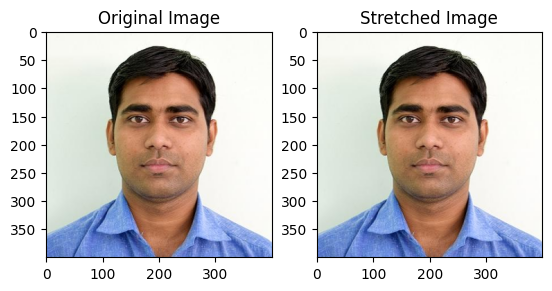

In [2]:
# Import the necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the input image in color
img = cv2.imread('./SBsir.jpg', cv2.IMREAD_COLOR)

# Split the image into color channels
r, g, b = img[:,:,0], img[:,:,1], img[:,:,2]

# Initialize the histograms for each channel
hist_r = np.zeros(400)
hist_g = np.zeros(400)
hist_b = np.zeros(400)

# Calculate the histograms for each channel
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      hist_r[r[i,j]] += 1
      hist_g[g[i,j]] += 1
      hist_b[b[i,j]] += 1

# Plot the histograms for each channel
plt.plot(hist_r, color='red', alpha=0.5)
plt.plot(hist_g, color='green', alpha=0.5)
plt.plot(hist_b, color='blue', alpha=0.5)
plt.show()

# Find the minimum and maximum values for each channel
min_r, max_r = np.min(r), np.max(r)
min_g, max_g = np.min(g), np.max(g)
min_b, max_b = np.min(b), np.max(b)

# Initialize the arrays for the stretched channels
re_stretch = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
gr_stretch = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
bl_stretch = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)

# Stretch the contrast for each channel
for i in range(img.shape[0]):
   for j in range(img.shape[1]):
      re_stretch[i,j] = int((r[i,j] - min_r) * 255 / (max_r - min_r))
      gr_stretch[i,j] = int((g[i,j] - min_g) * 255 / (max_g - min_g))
      bl_stretch[i,j] = int((b[i,j] - min_b) * 255 / (max_b - min_b))

# Merge the channels back together
img_stretch = cv2.merge((re_stretch, gr_stretch, bl_stretch))

# Display the original and stretched images side by side
plt.subplot(121)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.subplot(122)
plt.imshow(cv2.cvtColor(img_stretch, cv2.COLOR_BGR2RGB))
plt.title('Stretched Image')
plt.show()